# Steps



1.   Download Kaggle
2.   List Data Dictionary
3. Data Check for MisVals, Dups, Uniques
4. Data Check for Categorical Columns
5.



# Downloading dataset from kaggle


upload token kaggle.json to colab and run cells

In [13]:
# check for current working directory
!pwd

/content


In [14]:
# install kaggle library
! pip install kaggle

In [15]:
# make a env-type folder to store token
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
# copy token from pwd to env-type folder
! cp kaggle.json ~/.kaggle/

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

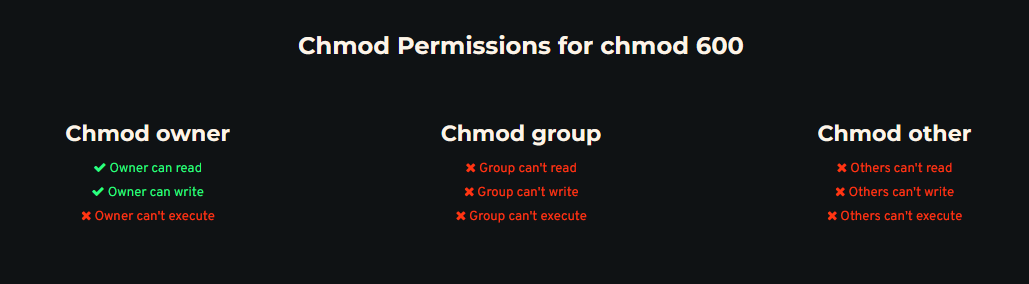

In [18]:
# download the dataset using kaggle lib
!kaggle datasets download hellbuoy/car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 40.7MB/s]


In [19]:
# unzip the content
! unzip /content/car-price-prediction.zip

Archive:  /content/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


# Prep work

In [20]:
import pandas as pd
import inspect #to inspect dataset with custom function
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #correlation matrix and logarithmic


import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.__version__

'2.2.2'

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Dictionary

car_ID: Unique ID # for each car

Symboling: Acturian assessment of risk of the car (numerical values where -3 is safe, +3 is risky)

CarName: Make and model of car

Fueltype: Car Fuel Type (gas or diesel)

Aspiration: Car Aspiration (standard or turbo)

Doornumber: Number of car doors (two or four)

Carbody: Type of car body (convertible, sedan, hatchback, wagon, or hardtop)

Drivewheel: Car drive wheel (rear wheel drive, 4 wheel drive or front wheel drive)

Enginelocation: Location of car engine (front of rear)

Wheelbase: Car wheel base in inches

Carlength: Car length in inches

Carwidth: Car width in inches

Carheight: Car height in inches

Curbweight: Car weight in pounds

Enginetype: Car engine type (dohc, dohcv, I, ohc, ohcf, ohcv, or rotor)

Cylindernumber: Number of car cylinders (two, three, four, five, six, eight, or twelve)

Enginesize: Size of engine (numerical values of cubic inches)

Fuelsystem: Type of car fuel system (1bbl, 2 bbl, 4 bbl, idi, mfi, mpfi, spdi, or spfi)

Boreratio: Car Bore-Stroke Ratio is the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length

Stroke: Car strokes (numerical value in strokes)

Compressionratio: Car compression ratio (ratio between the volume of the cylinder with the piston in the bottom position, Vbottom (largest volume), and in the top position, Vtop (smallest volume))

Horsepower: Car horsepower (numerical values of horsepower)

Peakrpm: Car peak RPM (revolutions per minute)

Citympg: Car city MPG (miles per gallon)

Highwaympg: Car highway MPG (miles per gallon)

Price: total price of car in dollars

In [24]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
121,122,1,plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
61,62,1,mazda glc custom,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595.0
152,153,1,toyota corolla 1200,gas,std,four,hatchback,fwd,front,95.7,158.7,63.6,54.5,2015,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,54.7,2324,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949.0


# Custom function to check data

In [25]:
def data_check(*datasets):
    """
    Function to display missing values, percentage of missing values,
    duplicated data, total rows, unique values, and dtype of each column for multiple datasets.

    :param datasets: One or more pandas dataframes to check.
    :return: A summary dataframe with the details for all datasets.
    """

    # Get the variable names from the caller's scope
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_names = [name for name, val in caller_locals.items() if id(val) in [id(ds) for ds in datasets]]

    summary_list = []  # To store details for each dataset

    for i, data in enumerate(datasets):
        # Get the name of the dataset variable
        dataset_name = dataset_names[i] if i < len(dataset_names) else f'Dataset_{i+1}'

        # For each dataset, compute the necessary details
        null_counts = data.isnull().sum()
        null_percentage = (null_counts / len(data)) * 100
        dup_count = data.duplicated().sum()
        dtypes = data.dtypes
        total_rows = len(data)
        unique_values = data.nunique()  # Calculate unique values per column

        # Create a temporary DataFrame to store the results for this dataset
        temp_df = pd.DataFrame({
            'Dataset': dataset_name,
            'Column': data.columns,
            'Data Type': dtypes.values,
            'Missing Values': null_counts.values,
            'Percentage Missing': null_percentage.values,
            'Total Rows': [total_rows] * len(data.columns),
            'Duplicate Rows': [dup_count] * len(data.columns),
            'Unique Values': unique_values.values  # Add unique values per column
        })

        # Append the result to the summary list
        summary_list.append(temp_df)

    # Concatenate all summaries into one DataFrame
    final_summary = pd.concat(summary_list, ignore_index=True)

    return final_summary

## Check for Misval, Dups, Unique

In [26]:
data_check(df)

,Dataset,Column,Data Type,Missing Values,Percentage Missing,Total Rows,Duplicate Rows,Unique Values
0,df,car_ID,int64,0,0.0,205,0,205
1,df,symboling,int64,0,0.0,205,0,6
2,df,CarName,object,0,0.0,205,0,147
3,df,fueltype,object,0,0.0,205,0,2
4,df,aspiration,object,0,0.0,205,0,2
5,df,doornumber,object,0,0.0,205,0,2
6,df,carbody,object,0,0.0,205,0,5
7,df,drivewheel,object,0,0.0,205,0,3
8,df,enginelocation,object,0,0.0,205,0,2
9,df,wheelbase,float64,0,0.0,205,0,53


# Custom function to check categorical columns

In [27]:
def categorical_summary(df):
    """
    Automatically detects categorical/'object' columns in a DataFrame
    and prints unique values for each categorical column.

    :param df: Input pandas DataFrame
    """
    # Detect categorical columns (object dtype and category dtype)
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not categorical_columns:
        print("No categorical columns found in the DataFrame.")
        return

    print(f"Found {len(categorical_columns)} categorical columns:\n")
    for col in categorical_columns:
        unique_vals = df[col].unique()
        print(f"'{col}' has {len(unique_vals)} unique categories: {unique_vals}\n")

In [28]:
categorical_summary(df)

Found 10 categorical columns:

'CarName' has 147 unique categories: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick cen

## dropping car_ID and carName because these two are not relevant for Regression Analysis

In [29]:
df =df.drop(['car_ID', 'CarName'], axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Distribution num feats

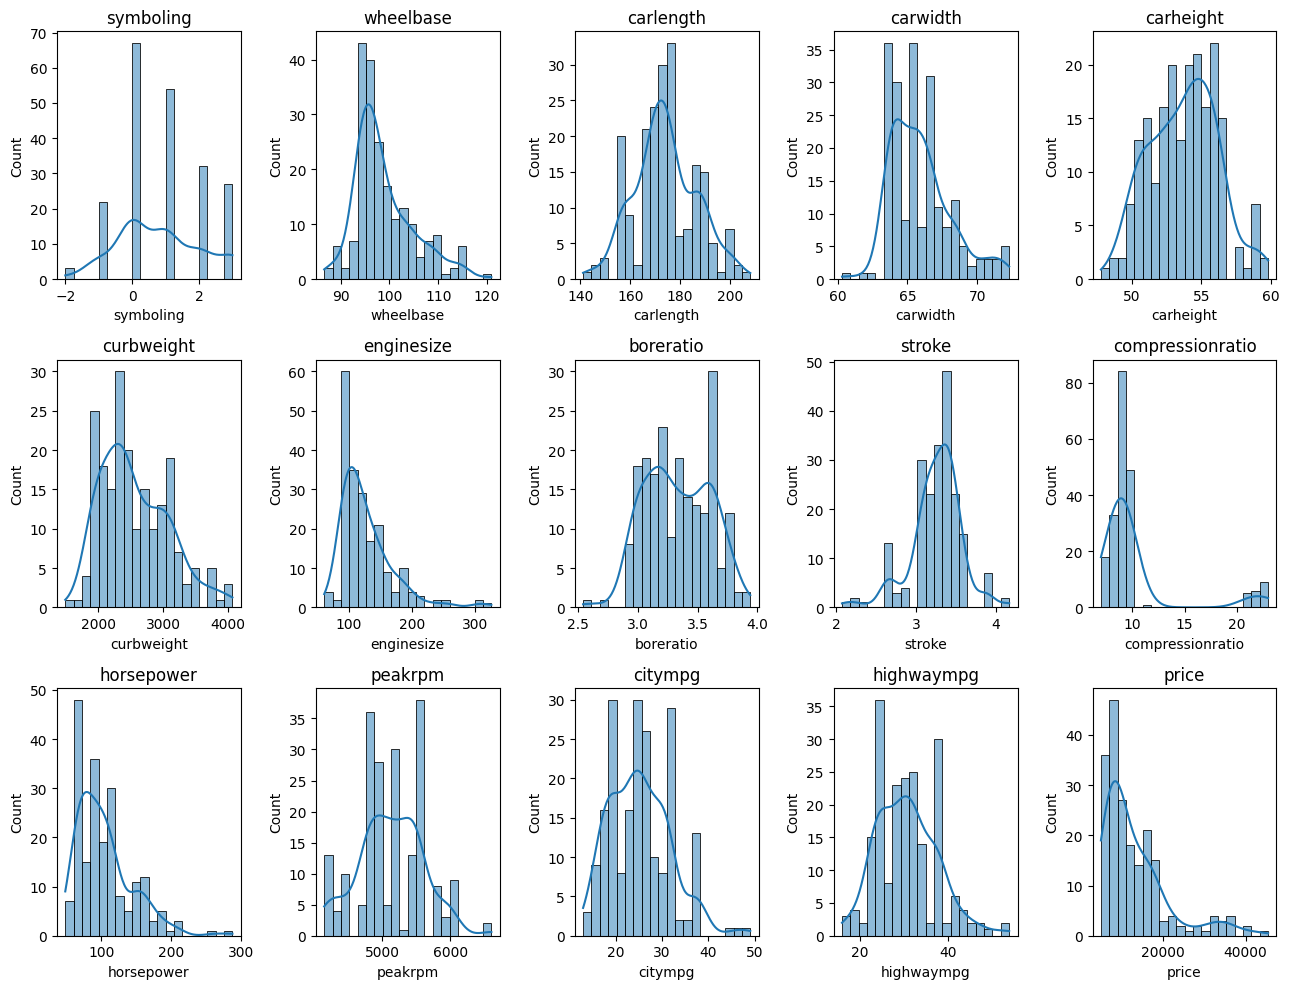

In [30]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(13, 10))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Insights Num Feats dist

symboling column must be treated as str or object as it is in fact not a num feat

In [31]:
# df['symboling'] = df['symboling'].astype(object)

In [32]:
# df['symboling'].dtype

In [33]:
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Price Distribution

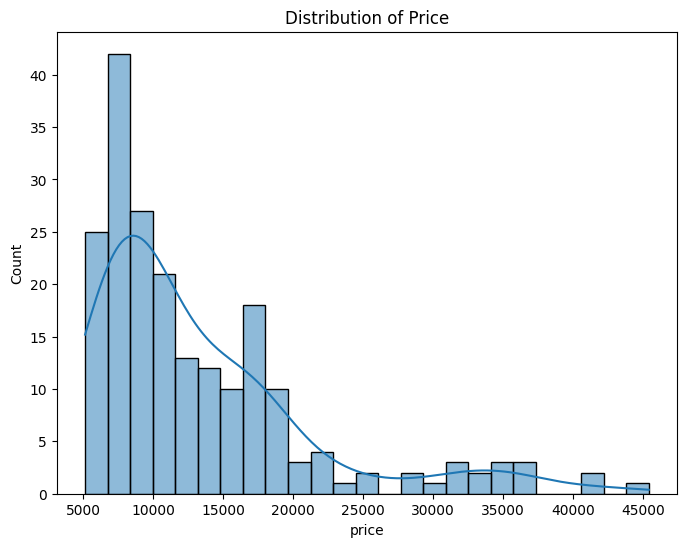

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=25, kde=True)
plt.title('Distribution of Price')
plt.show()

## insights Price Dist

highly skewed distribution, might need to apply log transformation which leads to log log level regression (?)

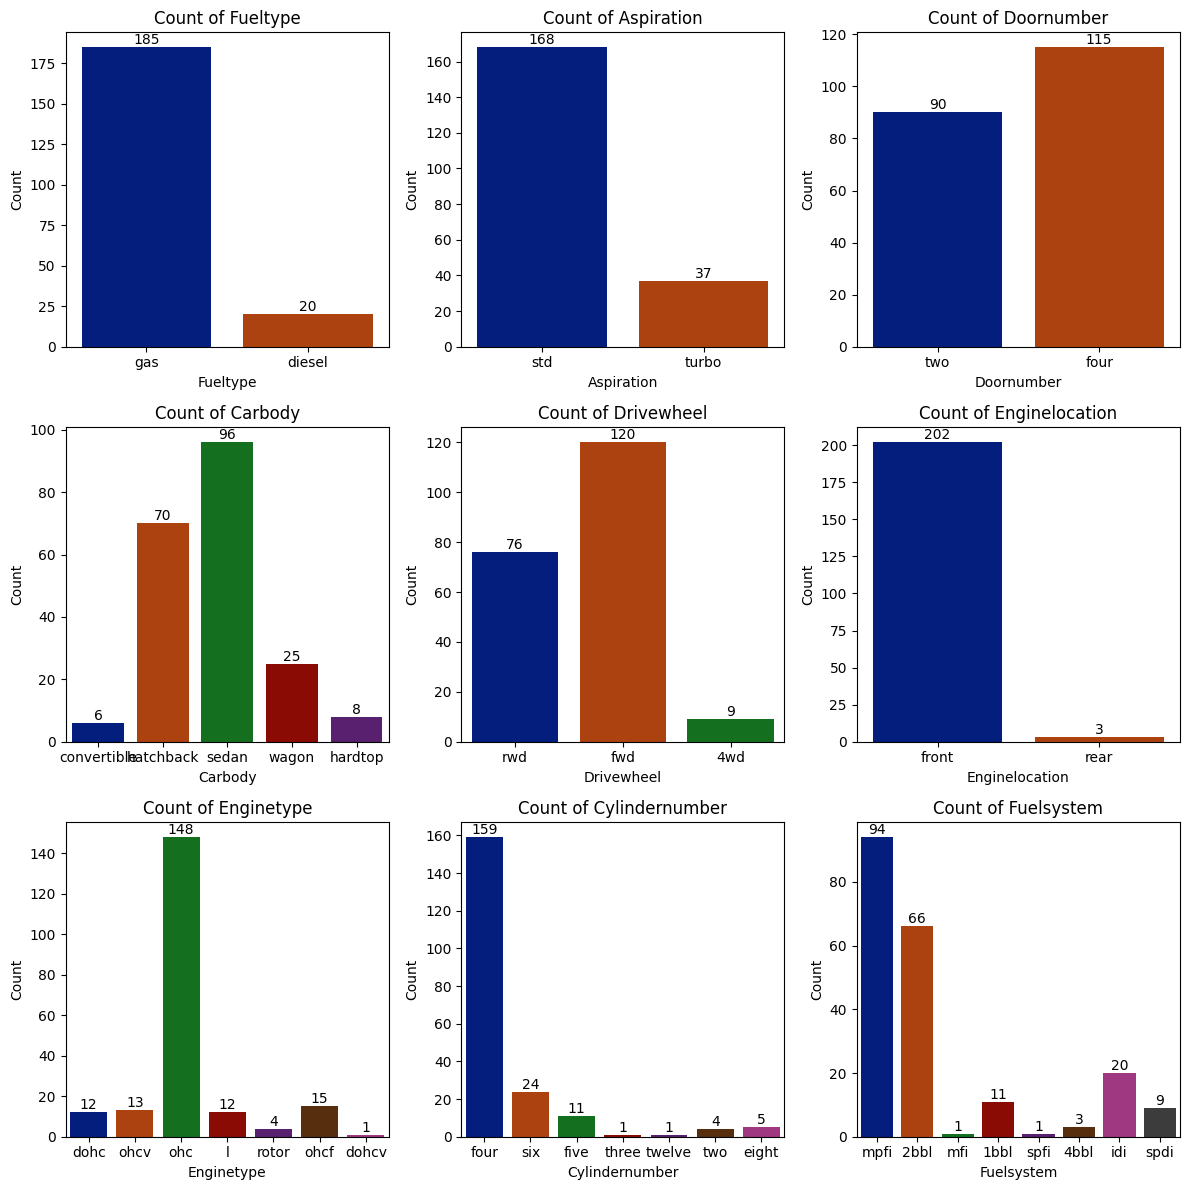

In [35]:
# Define the list of categorical columns to analyze
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='dark', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

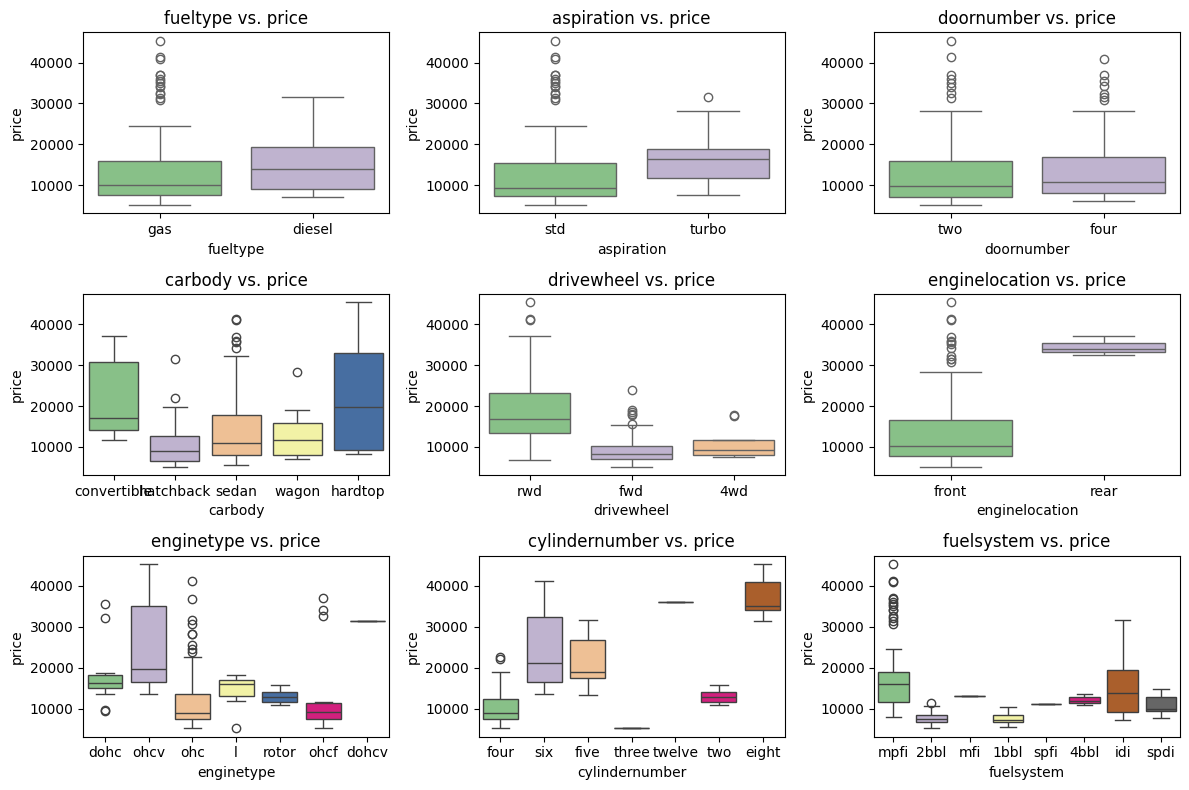

In [36]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)

    # Get unique categories and generate a color palette
    n_categories = df[feature].nunique()
    palette = sns.color_palette("Accent", n_categories)

    # Create boxplot with dynamic colors
    sns.boxplot(data=df, x=feature, y='price', palette=palette)
    plt.title(f'{feature} vs. price')

plt.tight_layout()
plt.show()

# Correlation Matrix Numerical

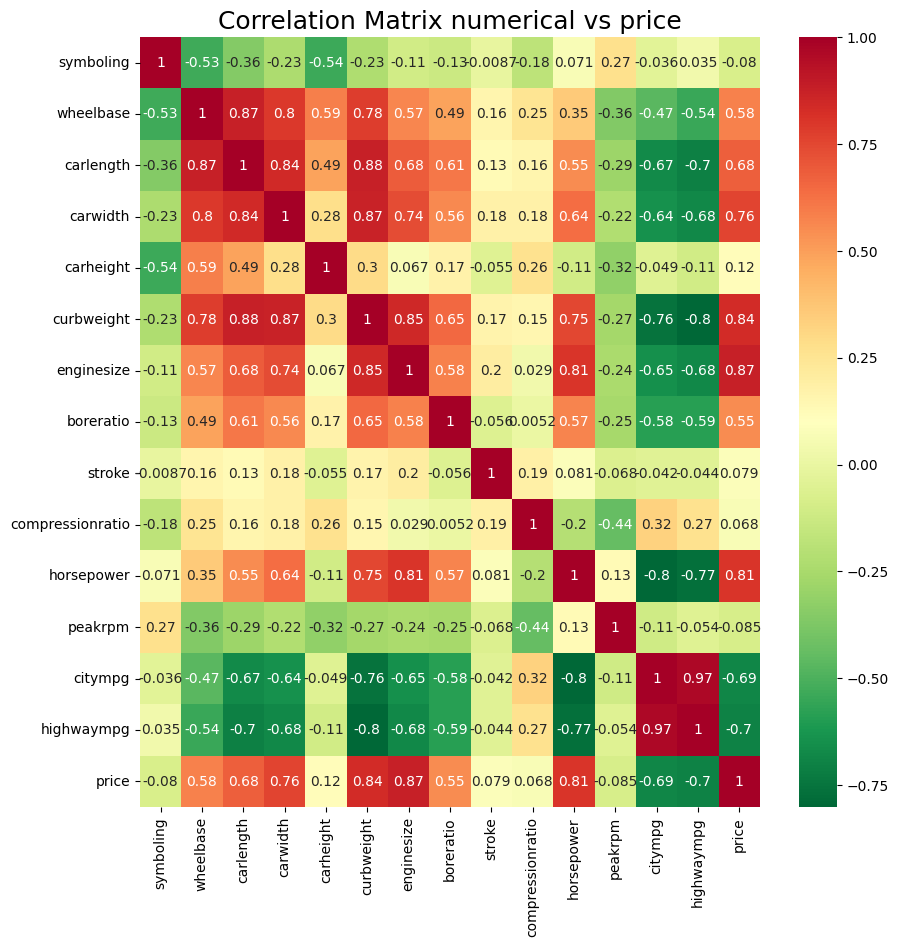

In [37]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap='RdYlGn_r', annot=True)


plt.title("Correlation Matrix numerical vs price", fontsize = 18)
plt.show()

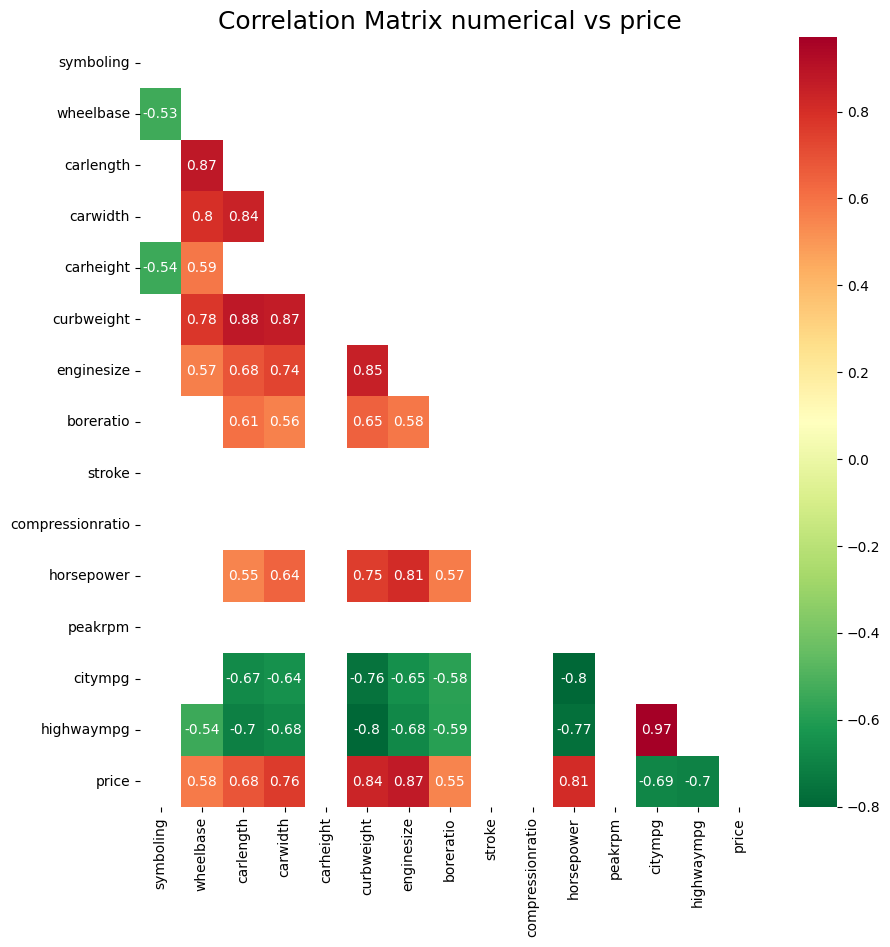

In [38]:
df_corr = df[numerical_features]
corr = df_corr.corr(method='pearson')

plt.subplots(figsize=(10, 10))

# create mask to display only the bottom triangle and filter out corr coef below 0.5
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlGn_r', mask=trimask | (np.abs(corr) <= 0.5), annot=True)


plt.title("Correlation Matrix numerical vs price", fontsize = 18)
plt.show()

In [39]:
numerical_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [40]:
num_feats = [col for col in numerical_features if col != 'price']

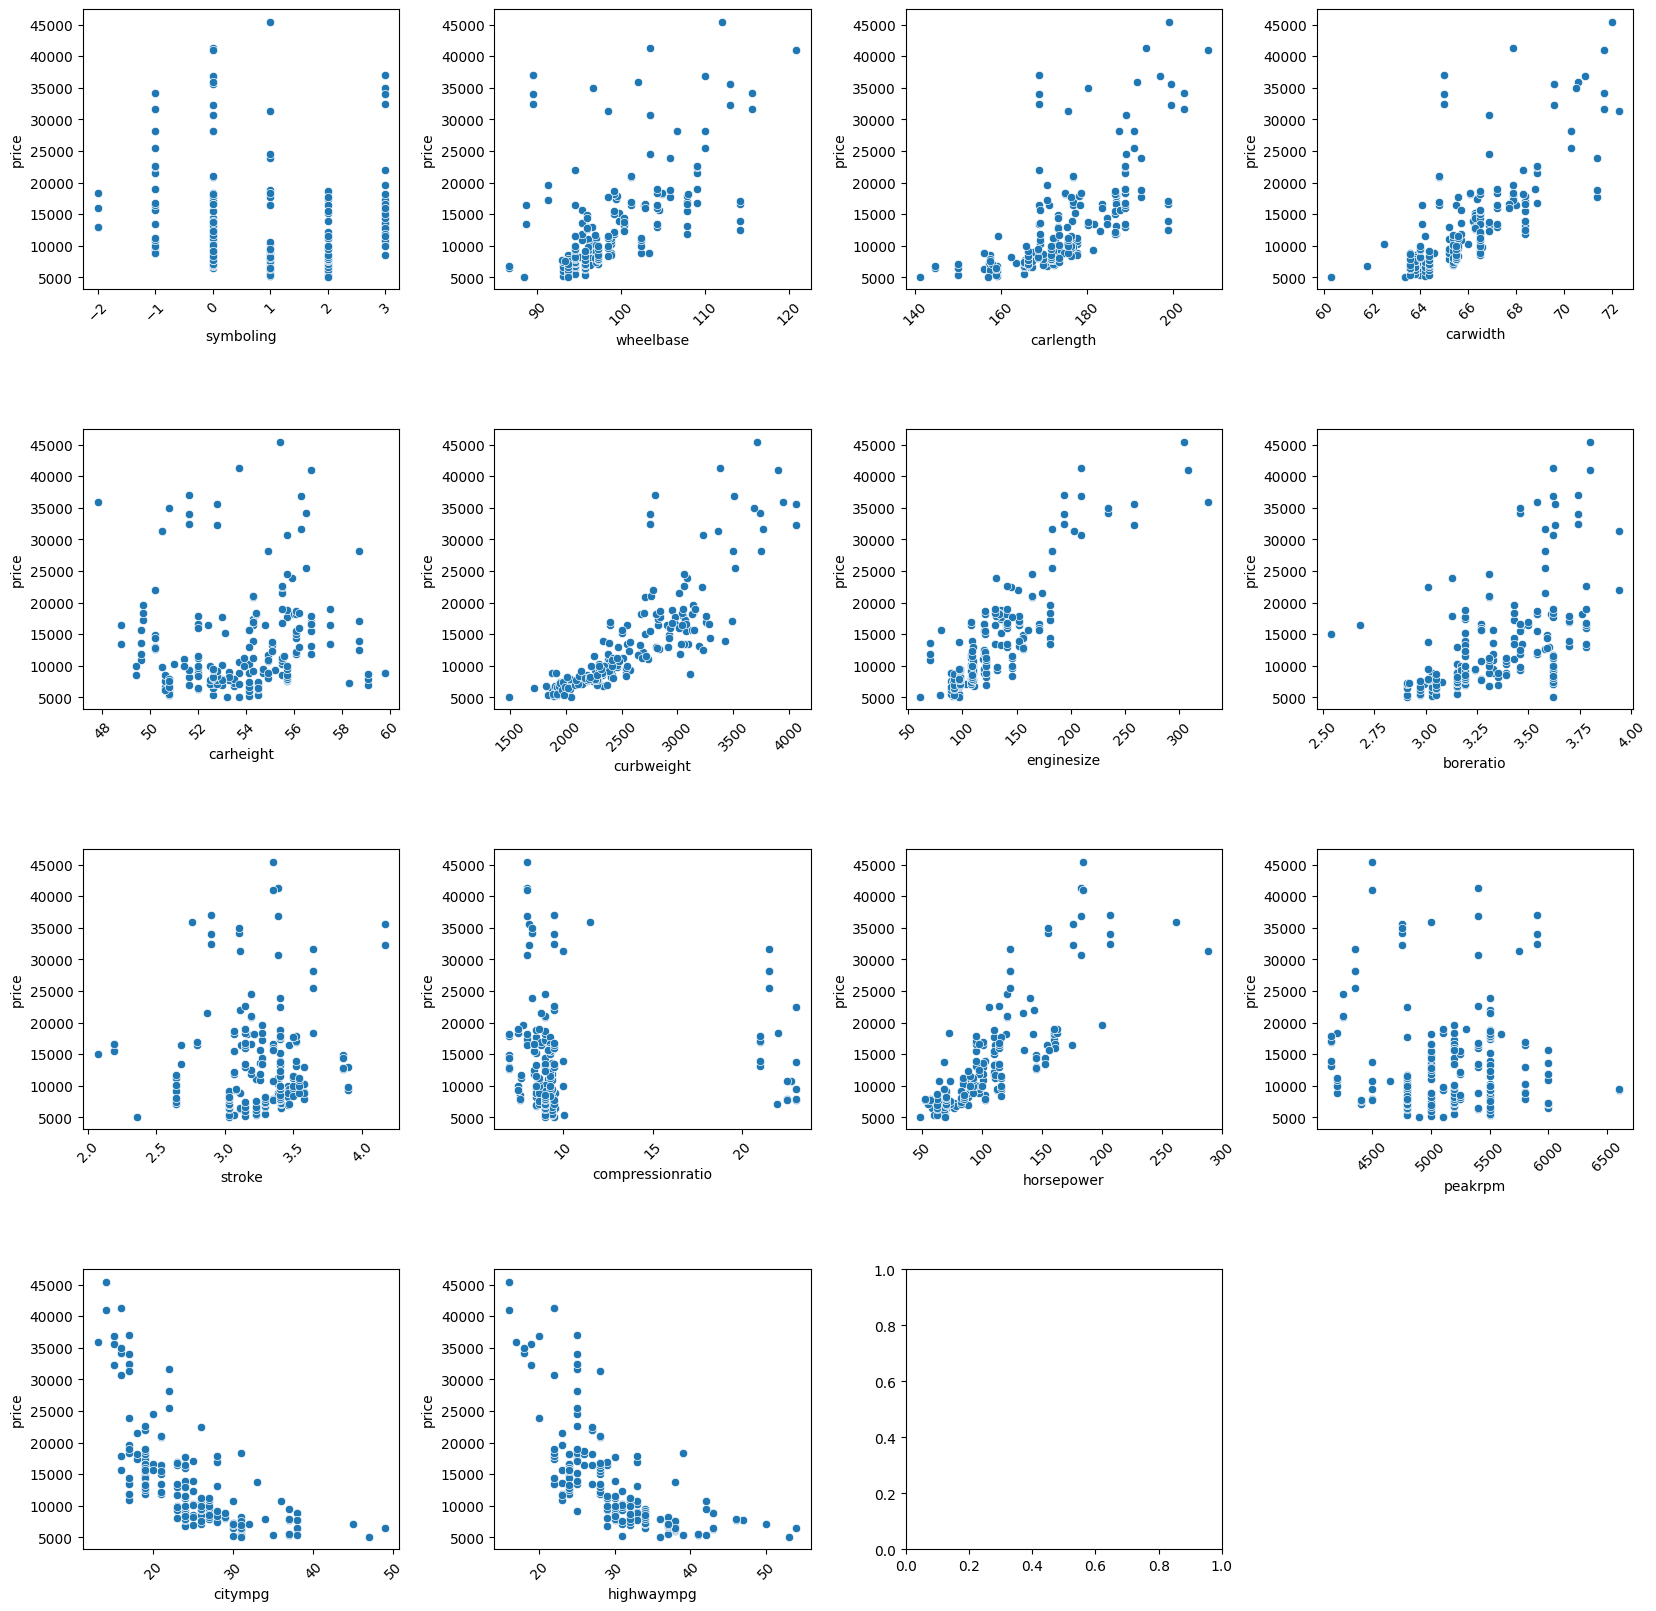

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flat = axes.flatten()  # Flatten to 1D for easy indexing

for x, col in enumerate(num_feats):
    ax = axes_flat[x]  # Use flat index
    sns.scatterplot(x=col, y='price', data=df, ax=ax)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide the unused last subplot (index 15)
axes_flat[15].set_axis_off()

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust vertical AND horizontal spacing
plt.show()

In [ ]:
# data train-Test split

X = df[num_feats]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
# Inisialisasi Model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regresion':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1),
    'ElasticNet Regression':ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [ ]:
print(mean_squared_error)

In [ ]:
# Loop training dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil evaluasi di dictionary
    results[name] = {'RMSE': rmse, 'R^2': r2}

In [ ]:
# Tampilan Hasil Evaluasi
for model_name, metrics in results.items():
  print(f"{model_name}:")
  print(f" RMSE: {metrics['RMSE']:.2f}")
  print(f" R^2: {metrics['R^2']:.3f}")
  print("")

In [ ]:
results_df = pd.DataFrame(results).T

In [ ]:
# Visualisasi perbandingan R^2
results_df['R^2'].plot(kind='barh', figsize=(8,5), color='lightgreen')
plt.title('Model Copearison - R^2')
plt.xlabel('R^2')
plt.show()